In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ドリフトの決定(ここではu_t=0.5tとした)

In [2]:
def drift(t):
    return 0.5*t 

カメロンマルティン空間の基底（詳しくは参考文献[1][4]を参照）

In [3]:
def h(n,t):
    insin=(n-0.5)*np.pi*t/T
    return np.power(2*T,0.5)*np.sin(insin)/(sigma*np.pi*(n-0.5))

作用素の固有値（詳しくは参考文献[1][4]を参照）

In [4]:
def lamda(n):
    return sigma*T/(np.pi*(n-0.5))

入力された関数とカメロンマルティンのn番目の基底とのL^2内積を計算する関数

In [5]:
def L2_innerproduct(X,n):
    innerproduct=0
    for i in range(m):
        innerproduct += X[i]*h(n,i*m/T)*delta_t
    return innerproduct

ここの役割については文献[1]を参照。今回の実装の核

In [6]:
def Pi_n_X(t,n,X):
    sum=0
    for j in range(n):
        k=j+1
        lam_k=lamda(k)
        sum += (L2_innerproduct(X,k)+X_h[j])*np.power(sigma,2)*h(k,t)/np.power(lam_k,2)
    return sum

ここも詳細は[1]参照のこと

In [7]:
def Pi_n_L2norm(n,X):
    norm=0
    for i in range(m):
        t=i*T/m
        norm += np.power(Pi_n_X(t,n,X),2)*delta_t
    return norm

舞台設定

In [8]:
T=1.0#終端時刻
sigma=1#σの値
m=1000#時間の分割数
t=0#初期時刻
X=[0]*(m+1) #確率微分方程式のサンプルパスを格納
uhat=[0]*(m+1) #推定量を格納
loss=[0]*(m) #誤差の記録用配列
delta_t = T/m  #Δt
sigma_t = np.power(delta_t,0.5)#ブラウン運動実装のための標準偏差
delta_W = np.random.normal(0,sigma_t,m)#ブラウン運動実装用の乱数

まずは最尤推定量の誤差を見るとともにXを実装する（最尤法ではXがそのままuの推定量となる）

In [9]:
for i in range(m):
    t=t+delta_t
    X[i+1]=X[i]+drift(t)*delta_t+sigma*delta_W[i]
    loss[i]=np.absolute(X[i]-drift(t))

推定量の構成

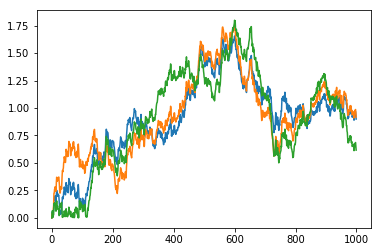

In [12]:
plt.plot(loss)#最尤推定量の誤差の表示
for l in range(2):#近似の次元をあげていく
    n=l+8
    X_h = np.random.normal(0,1,n)#ここの役割について詳しくは文献[1]を参照
    Pi_n_norm=Pi_n_L2norm(n,X)
    for i in range(m):#推定量の構成と誤差の計測
        t=i*T/m
        uhat[i]=X[i]-(n-2)*Pi_n_X(t,n,X)/Pi_n_norm
        loss[i]=np.absolute(uhat[i]-drift(t))
    plt.plot(loss)#誤差の表示
    n += 1

描画

In [13]:
plt.show()